# Deep Convolutional Neural Networks Theory (ConvNets)

_Keywords: receptive field, input, kernel, zero-padding, strides, output._

## Vectors vs. Matrices

**Key difference** - Inputs to CNNs are 2-D arrays instead of linearly indexed vectors.

![](https://www.jeremyjordan.me/content/images/2017/07/Screen-Shot-2017-07-26-at-4.26.01-PM.png)
_Source: [jeremyjordan.me](https://www.jeremyjordan.me)_

## Receptive Fields

_Resource: [A Guide to Receptive Field Arithmetic for Convolutional Neural Networks](https://syncedreview.com/2017/05/11/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks/)_

<img src="https://miro.medium.com/max/2340/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width=300>

In [14]:
from tensorflow.keras import layers

# Number of filters to learn
NUMBER_OF_FILTERS = 1

# Size of receptive field
KERNEL_SIZE = (3, 3)

convolutional_layer = layers.Conv2D(
    filters=NUMBER_OF_FILTERS,
    kernel_size=KERNEL_SIZE,
)

## Convolution

The process of moving the receptive field over the image, weighting each pixel in order to form new pixel values.

<img src="https://machinethink.net/images/vggnet-convolutional-neural-network-iphone/ConvolutionKernel@2x.png" width=200>

## Kernel

_A set of weights defined over the receptive field._

![](https://mlnotebook.github.io/img/CNN/convExample.png)

## Stride

_Step size of the receptive field as it moves over the input image._

<img src="https://miro.medium.com/max/1185/1*L4T6IXRalWoseBncjRr4wQ@2x.gif" width="49%"> <img src="https://miro.medium.com/max/1082/1*4wZt9G7W7CchZO-5rVxl5g@2x.gif" width="49%">

## Padding

![](https://miro.medium.com/max/1595/1*W2D564Gkad9lj3_6t9I2PA@2x.gif)

## Examples

### Convolution with zero-padding and with stride of 1

![](https://i0.wp.com/syncedreview.com/wp-content/uploads/2017/05/6.gif?resize=244%2C259&ssl=1)

### Convolution with zero-padding and with stride of 1

![](https://i2.wp.com/syncedreview.com/wp-content/uploads/2017/05/7.gif?resize=395%2C449&ssl=1)

### Convolution with zero-padding and with stride of 2

![](https://i2.wp.com/syncedreview.com/wp-content/uploads/2017/05/8.gif?resize=395%2C381&ssl=1)

# CNN and the MNIST dataset (Numerical Example)

Following the [Convolutional Neural Networks Tensorflow 2.0 tutorial](https://www.tensorflow.org/beta/tutorials/images/intro_to_cnns).

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

import matplotlib as mpl
from matplotlib import pyplot as plt

# Enable GPU support

In order to enable GPU support on Tensorflow v2.0 in Jupyter Lab, follow [this guide](https://github.com/tensorflow/tensorflow/issues/24828#issuecomment-464910864).

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Importing the dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [12]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [18]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=100, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 29us/sample - loss: 1.9417e-04 - accuracy: 0.9999 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 2/10
54000/54000 [==============================] - 2s 28us/sample - loss: 3.4221e-05 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 3/10
54000/54000 [==============================] - 2s 28us/sample - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.0089 - val_accuracy: 0.9980
Epoch 4/10
54000/54000 [==============================] - 2s 28us/sample - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0082 - val_accuracy: 0.9982
Epoch 5/10
54000/54000 [==============================] - 2s 28us/sample - loss: 5.8670e-04 - accuracy: 0.9998 - val_loss: 0.0054 - val_accuracy: 0.9990
Epoch 6/10
54000/54000 [==============================] - 2s 28us/sample - loss: 2.4302e-05 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 7/10
54000/54000 [=================

In [14]:
model.evaluate(test_images, test_labels, verbose=False)

[0.04461154832937404, 0.993]

In [17]:
print("GPU Available: ", tf.test.is_gpu_available())

GPU Available:  True


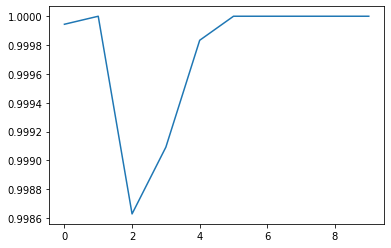

In [20]:
plt.plot(history.history["accuracy"])

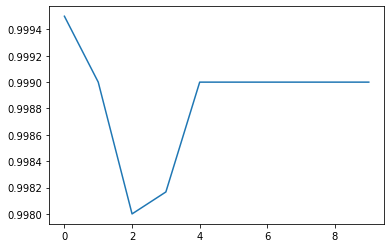

In [21]:
plt.plot(history.history["val_accuracy"])